In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from preprocess import get_prepared_data

In [2]:
# Load preprocessed, prepared, relabelled data
X, y = get_prepared_data()

# Split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7225636523266022

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.34      0.50       456
           1       0.69      0.98      0.81       683

    accuracy                           0.72      1139
   macro avg       0.80      0.66      0.65      1139
weighted avg       0.78      0.72      0.68      1139



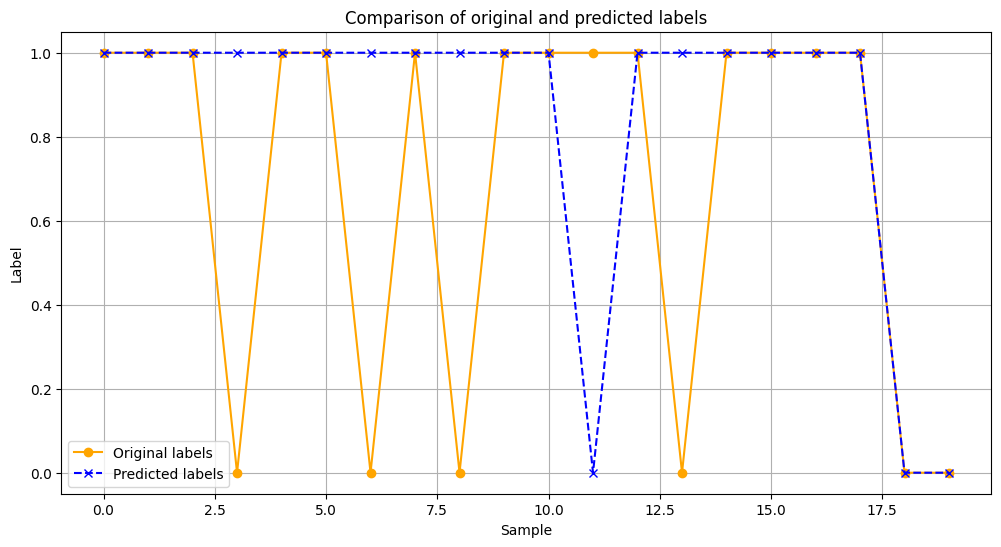

In [5]:
# Plot comparison of original and predicted labels
num_samples_to_plot = 20
indices = np.arange(num_samples_to_plot)
original_labels = y_test[:num_samples_to_plot]
predicted_labels = y_pred[:num_samples_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(indices, original_labels, marker='o', linestyle='-', color='orange', label='Original labels')
plt.plot(indices, predicted_labels, marker='x', linestyle='--', color='blue', label='Predicted labels')
plt.xlabel("Sample")
plt.ylabel("Label")
plt.title("Comparison of original and predicted labels")
plt.legend()
plt.grid(True)
plt.show()